In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import re
import string

In [30]:
animal= pd.read_csv("zoo.csv")

In [31]:
animal.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [32]:
animal.groupby('class_type').mean()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
class_type,,,,,,,,,,,,,,,,
1,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488
2,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000
3,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000
4,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692
5,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000
6,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000
7,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


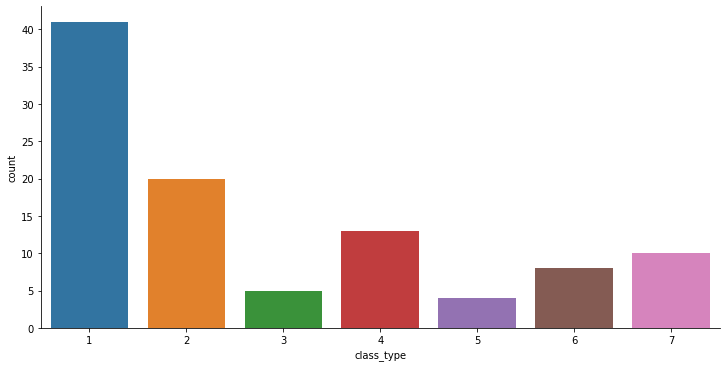

In [33]:
# See which class the most zoo animals belong to
sns.factorplot('class_type', data=animal,kind="count", aspect=2)

In [34]:
from sklearn.model_selection import train_test_split
# 80/20 split
#animal=animal.drop(['eggs', 'hair'], axis=1)
#X = animal.iloc[:,1:15]
#y = animal.iloc[:,15]
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.shape


(80, 16)

In [36]:
from sklearn import svm

#Create a svm Classifier
clf = svm.LinearSVC()

In [37]:
clf.fit(X_train, y_train)

LinearSVC()

In [38]:
y_train_predict = clf.predict(X_train)

In [39]:
y_test_predict = clf.predict(X_test)

In [40]:
y_train_predict.shape

(80,)

In [41]:
from sklearn import metrics

acc = metrics.accuracy_score(y_train, y_train_predict)
print("Train Accuracy : ",acc*100)

Train Accuracy :  100.0


In [47]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_test_predict)
print("Train Accuracy : ",acc*100)

Train Accuracy :  95.23809523809523


In [ ]:
def learn_curve(X,y,c):
    ''' param X: Matrix of input features
        param y: Vector of Target/Label
        c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    '''
    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
       KFold CV is a preffered metho compared to hold out CV, since the model is tested on all the examples.
       Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
    '''
    
    le = LabelEncoder() # Label encoding the target
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    
    log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model
    
    # Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',log_reg]))